In [2]:
#from keras.datasets import mnist

#(x_train,y_train),(x_test,y_test) = mnist.load_data()

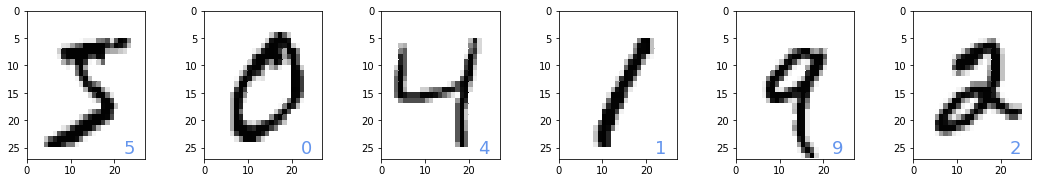

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(18,6))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(6):
    plt.subplot(2,6,id + 1)
    img = x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(22,26,"%d"% y_train[id],color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)

plt.show()